# **Análise Estatística da Mortalidade por AIDS no Estado de Goiás**

 Objetivo: Criar um pipeline que extrai, transforma, analisa e gera insights através de gráficos sobre a mortalidade por AIDS no estado de Goiás, no período de 2010 a 2024


## **📊 Perguntas Gerais**

### Distribuição Temporal

1. Quantos óbitos por AIDS ocorreram em Goiás ao longo do tempo?
2. Qual município teve o maior número de óbitos?
3. Como a mortalidade por AIDS está distribuída por macrorregião e região?

### Perguntas Demográficas e Perfil das Vítimas

4. Qual a distribuição de óbitos por sexo? Há diferenças significativas entre homens e mulheres?
5. Qual a distribuição por raça/cor?
6. Qual faixa etária é mais afetada?
7. Existe alguma relação entre escolaridade e mortalidade por AIDS?

### Análises Geográficas

8. Como a taxa de mortalidade por município se distribui no mapa de Goiás?
9. Quais municípios tiveram um crescimento ou redução no número de óbitos ao longo dos anos?
10. Há correlação entre macrorregião e a quantidade de óbitos? Algumas áreas são mais afetadas?

### Tendências e Comparações

11. A mortalidade por AIDS tem aumentado ou diminuído ao longo dos anos?
12. Quais são os períodos do ano com mais óbitos? Existe sazonalidade?
13. O número de óbitos por AIDS é maior entre adultos, crianças ou gestantes?
14. Qual a relação entre sexo e faixa etária na mortalidade por AIDS?


## **📌 Perguntas para Análise de Mortalidade por AIDS e Geral em Goiás**

### Relação entre Óbitos por AIDS e Mortalidade Geral

1. Qual a porcentagem de óbitos por AIDS em relação à mortalidade geral no estado de Goiás?

2. Como a mortalidade por AIDS se compara à mortalidade geral em diferentes faixas etárias e sexos?

3. Quais municípios possuem as maiores taxas de mortalidade por AIDS em relação à mortalidade geral?

4. Há regiões específicas com aumento ou redução dos óbitos por AIDS ao longo do tempo?

### Análises Temporais e Geográficas

5. Como a evolução da mortalidade por AIDS se comporta em relação à mortalidade geral ao longo dos anos?

6. Quais municípios tiveram crescimento ou redução significativa na mortalidade por AIDS?

7. Há regiões onde a mortalidade geral é alta, mas a de AIDS é baixa (ou vice-versa)?

### Perfil das Vítimas e Padrões de Mortalidade

8. Qual a distribuição dos óbitos por AIDS em relação ao Cód. CID-10 na base de mortalidade geral?

9. Quais outras causas de morte aparecem frequentemente junto aos óbitos por AIDS?

10. Como a escolaridade influencia na taxa de mortalidade por AIDS? (se aplicável)

11. Há alguma correlação entre faixa etária, sexo e mortalidade por AIDS vs. mortalidade geral?


 - Instalando as bibliotecas necessárias: 

In [63]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import os
!pip install -q matplotlib==3.7.1 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

## 2. Extração

### 2.1 Extração do dataset de mortalidade por AIDs

In [38]:
# Obtendo a página de dados de Mortalidade de AIDS
url = "https://dados.saude.go.gov.br/lv/dataset/ist-aids/resource/496e556f-ac27-45d6-b73c-8c30a918bf1c"
response = requests.get(url)

if response.status_code == 200:
    print("Requisição bem-sucedida!")
else:
    print(f"Erro na requisição: {response.status_code}")
    
# Extraindo o arquivo do elemento botão 
# Utilizando a biblioteca Soup para parsear o retorno da requisição
soup = BeautifulSoup(response.text, "html.parser")
link_arq = soup.find("a", class_="btn btn-primary resource-url-analytics resource-type-None")

if link_arq:
    print("URL do arquivo obtida")
else:
    print("Falha ao obter URL do arquivo")
        
#Criando dataframe com os dados
obitos_aids = pd.read_csv(link_arq["href"], sep=";", encoding="UTF-8")
    
if not obitos_aids.empty:
    print("Arquivo extraido com sucesso! Dados em dataframe")
else:
    print("Falha ao extrair arquivo da fonte na Web")
    

Requisição bem-sucedida!
URL do arquivo obtida
Arquivo extraido com sucesso! Dados em dataframe


### 2.2 Extração do dataset de mortalidade geral

In [39]:
# Obtendo a página de dados de Mortalidade Geral
url = "https://dados.saude.go.gov.br/lv/dataset/mortalidade-geral/resource/2ff2bb21-9e9c-4775-a4d5-c1c8971ef1cf"
response = requests.get(url)

if response.status_code == 200:
    print("Requisição bem-sucedida!")
else:
    print(f"Erro na requisição: {response.status_code}")
    
# Extraindo o arquivo do elemento botão 
# Utilizando a biblioteca Soup para parsear o retorno da requisição
soup = BeautifulSoup(response.text, "html.parser")
link_arq = soup.find("a", class_="btn btn-primary resource-url-analytics resource-type-None")

if link_arq:
    print("URL do arquivo obtida")
else:
    print("Falha ao obter URL do arquivo")
        
#Criando dataframe com os dados
mortalidade_geral = pd.read_csv(link_arq["href"], sep=";", encoding="UTF-8")
    
if not mortalidade_geral.empty:
    print("Arquivo extraido com sucesso! Dados em dataframe")
else:
    print("Falha ao extrair arquivo da fonte na Web")
    

Requisição bem-sucedida!
URL do arquivo obtida
Arquivo extraido com sucesso! Dados em dataframe


## 3. Tratmento e limpeza inicial dos dados

### 3.1 Visão Geral inicial dos dados

In [40]:
obitos_aids.head(5)

,data_obito,codigo_ibge,municipio,regiao,macrorregiao,sexo,raca_cor,faixa_etaria,escolaridade,classificacao
0,03/01/2010,520140,Aparecida de Goiânia,Região Centro-Oeste,Centro Sudeste,MASCULINO,PARDA,30 A 39 ANOS,IGNORADO,ADULTO
1,04/01/2010,520140,Aparecida de Goiânia,Região Centro-Oeste,Centro Sudeste,MASCULINO,PARDA,50 A 59 ANOS,4 A 7 ANOS,ADULTO
2,04/01/2010,521523,Novo Gama,Região Centro-Oeste,Nordeste,MASCULINO,PARDA,30 A 39 ANOS,4 A 7 ANOS,ADULTO
3,05/01/2010,520000,Município ignorado - GO,Região Centro-Oeste,Município ignorado - GO,IGNORADO,PRETA,IGNORADA,IGNORADO,ADULTO
4,06/01/2010,521740,Pires do Rio,Região Centro-Oeste,Centro Sudeste,MASCULINO,PARDA,20 A 29 ANOS,IGNORADO,ADULTO


In [41]:
mortalidade_geral.head(5)

,Município residência,Estado residência,Município ocorrência,Estado ocorrência,ano,faixa_etaria,sexo,Cód. CID 10,dcid_capitulo,total óbitos
0,Abadiânia,GO,Abadiânia,GO,1996.0,10 A 14 ANOS,MASCULINO,Y334,XX,1
1,Abadiânia,GO,Abadiânia,GO,1996.0,10 A 14 ANOS,MASCULINO,Y349,XX,1
2,Abadiânia,GO,Abadiânia,GO,1996.0,15 A 19 ANOS,MASCULINO,R99,XVIII,1
3,Abadiânia,GO,Abadiânia,GO,1996.0,20 A 29 ANOS,FEMININO,V892,XX,1
4,Abadiânia,GO,Abadiânia,GO,1996.0,20 A 29 ANOS,MASCULINO,V892,XX,1


In [42]:
print(f"O dataset obitos_aids possui {obitos_aids.size} registros")
print(f"Já o dataset mortalidade_geral possui {mortalidade_geral.size} registros")

O dataset obitos_aids possui 44050 registros
Já o dataset mortalidade_geral possui 6916010 registros


In [43]:
#Tipos dos dados das colunas 
obitos_aids.dtypes

data_obito       object
codigo_ibge       int64
municipio        object
regiao           object
macrorregiao     object
sexo             object
raca_cor         object
faixa_etaria     object
escolaridade     object
classificacao    object
dtype: object

In [44]:
obitos_aids.dtypes

data_obito       object
codigo_ibge       int64
municipio        object
regiao           object
macrorregiao     object
sexo             object
raca_cor         object
faixa_etaria     object
escolaridade     object
classificacao    object
dtype: object

In [45]:
#Tipos dos dados das colunas 
mortalidade_geral.dtypes

Município residência     object
Estado residência        object
Município ocorrência     object
Estado ocorrência        object
ano                     float64
faixa_etaria             object
sexo                     object
Cód. CID 10              object
dcid_capitulo            object
total óbitos              int64
dtype: object

### 3.1 Tratamento inicial dos dados

Intervalos de data dos datasets:

In [46]:
print("Intervalo de datas dos dados de Mortalidade Geral:")
print(mortalidade_geral["ano"].min())
print("a")
print(mortalidade_geral["ano"].max())

Intervalo de datas dos dados de Mortalidade Geral:
1996.0
a
2024.0


In [47]:
print("Intervalo de datas dos dados de Obitos por AIDS:")
obitos_aids["data_obito"] = pd.to_datetime(obitos_aids["data_obito"], format="%d/%m/%Y", errors="coerce")
print(obitos_aids["data_obito"].dt.year.min())
print("a")
print(obitos_aids["data_obito"].dt.year.max())

Intervalo de datas dos dados de Obitos por AIDS:
2010
a
2025


Podemos ver que os dados dos dois datasets possuem intervalos de datas de registros diferentes.
Para favorecer futuras análises temporais e correlações, vamos fatiar os dados para que tenham correpondência de intervalos.
Logo, vamos capturar os insights refletidos entre os períodos de 2010 a 2024.

In [48]:
#Criando coluna com apenas o ano no dataset obitos_aids
obitos_aids["ano"] = obitos_aids["data_obito"].dt.year.astype("Int64")
#modificando tipo dos valores da coluna ano em mortalidade_geral
mortalidade_geral["ano"] = pd.to_numeric(mortalidade_geral["ano"], errors="coerce").astype("Int64")


In [49]:
obitos_aids.dtypes

data_obito       datetime64[ns]
codigo_ibge               int64
municipio                object
regiao                   object
macrorregiao             object
sexo                     object
raca_cor                 object
faixa_etaria             object
escolaridade             object
classificacao            object
ano                       Int64
dtype: object

In [50]:
mortalidade_geral.dtypes

Município residência    object
Estado residência       object
Município ocorrência    object
Estado ocorrência       object
ano                      Int64
faixa_etaria            object
sexo                    object
Cód. CID 10             object
dcid_capitulo           object
total óbitos             int64
dtype: object

In [51]:
#Fatiando os datasets para corresponderem ao mesmo intervalo
mortalidade_geral = mortalidade_geral[mortalidade_geral["ano"] >= 2010]
obitos_aids = obitos_aids[obitos_aids["ano"] < 2025]

In [52]:
print("Intervalo de datas dos dados de Mortalidade Geral agora é:")
print(mortalidade_geral["ano"].min())
print("a")
print(mortalidade_geral["ano"].max())

Intervalo de datas dos dados de Mortalidade Geral agora é:
2010
a
2024


In [53]:
print("Intervalo de datas dos dados de Obitos por AIDS agora é:")
obitos_aids["data_obito"] = pd.to_datetime(obitos_aids["data_obito"], format="%d/%m/%Y", errors="coerce")
print(obitos_aids["data_obito"].dt.year.min())
print("a")
print(obitos_aids["data_obito"].dt.year.max())

Intervalo de datas dos dados de Obitos por AIDS agora é:
2010
a
2024


## 4. Análise Exploratória dos Dados

Vamos focar nas perguntas a respeito de um unico data set: O de obitos por AIDS 

**Qual município teve o maior número de óbitos?**

In [54]:
obitos_por_municipio = obitos_aids.groupby("municipio")["data_obito"].count().sort_values(ascending=False)
obitos_por_municipio.head(10)

municipio
Goiânia                  1234
Aparecida de Goiânia      399
Anápolis                  222
Rio Verde                 176
Itumbiara                 115
Luziânia                  113
Valparaíso de Goiás       102
Trindade                   94
Águas Lindas de Goiás      93
Senador Canedo             86
Name: data_obito, dtype: int64

In [56]:
top5_obitos_por_municipio = list(obitos_por_municipio.head(5).items())
top5_obitos_por_municipio


[('Goiânia', 1234),
 ('Aparecida de Goiânia', 399),
 ('Anápolis', 222),
 ('Rio Verde', 176),
 ('Itumbiara', 115)]

In [57]:
print(
    f"O município com maior número de óbitos no período de 2010 a 2024 foi "
    f"{top5_obitos_por_municipio[0][0]} com {top5_obitos_por_municipio[0][1]} óbitos."
    )
print(
    f"Seguido por "
    f"{top5_obitos_por_municipio[1][0]} com {top5_obitos_por_municipio[1][1]} óbitos."
    )
print(
    f"Em terceiro, quarto e quinto lugar, ficaram, respectivamente os municipios: "
    f"\n{top5_obitos_por_municipio[2][0]} com {top5_obitos_por_municipio[2][1]} óbitos."
    f"\n{top5_obitos_por_municipio[3][0]} com {top5_obitos_por_municipio[3][1]} óbitos."
    f"\n{top5_obitos_por_municipio[4][0]} com {top5_obitos_por_municipio[4][1]} óbitos."
    )


O município com maior número de óbitos no período de 2010 a 2024 foi Goiânia com 1234 óbitos.
Seguido por Aparecida de Goiânia com 399 óbitos.
Em terceiro, quarto e quinto lugar, ficaram, respectivamente os municipios: 
Anápolis com 222 óbitos.
Rio Verde com 176 óbitos.
Itumbiara com 115 óbitos.


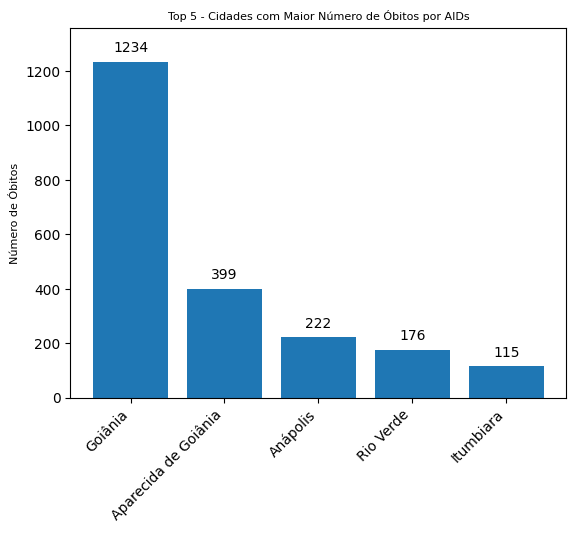

In [86]:
x = [estado[0] for estado in top5_obitos_por_municipio]
y = [obitos[1] for obitos in top5_obitos_por_municipio]

gf_obitos_municipio = plt.bar(x, y, width=0.8)
plt.title("Top 5 - Cidades com Maior Número de Óbitos por AIDs", fontsize=8)
plt.bar_label(gf_obitos_municipio, label_type='edge', padding=5, fontsize=10)
plt.ylabel('Número de Óbitos', fontsize=8)
plt.margins(y=0.1)
plt.xticks(rotation=45, ha='right')
plt.show()

Partindo para a próxima pergunta:

**Como a mortalidade por AIDS está distribuída por macrorregião e região?**

In [166]:
contagem_macrorregiao_num = obitos_aids.groupby("macrorregiao")["data_obito"].count().sort_values(ascending= False).head(5)


In [168]:
contagem_macrorregiao = contagem_macrorregiao_num.reset_index(name='numero_obitos')
total = contagem_macrorregiao['numero_obitos'].sum()
contagem_macrorregiao['porcentagem'] = contagem_macrorregiao['numero_obitos'] / total * 100

mensagem = (
    f"A macrorregião com maior número de óbitos no período de 2010 a 2024 foi {contagem_macrorregiao.iloc[0]['macrorregiao']} "
    f"com {contagem_macrorregiao.iloc[0]['numero_obitos']} óbitos, representando {contagem_macrorregiao.iloc[0]['porcentagem']:.1f}% dos óbitos.\n"
    f"Seguido por {contagem_macrorregiao.iloc[1]['macrorregiao']} com {contagem_macrorregiao.iloc[1]['numero_obitos']} óbitos, representando {contagem_macrorregiao.iloc[1]['porcentagem']:.1f}% dos óbitos.\n"
    "Em terceiro, quarto e quinto lugar, ficaram, respectivamente, as macrorregiões: " +
    ", ".join([
        f"{contagem_macrorregiao.iloc[i]['macrorregiao']} com {contagem_macrorregiao.iloc[i]['numero_obitos']} óbitos, representando {contagem_macrorregiao.iloc[i]['porcentagem']:.1f}%"
        for i in range(2, len(contagem_macrorregiao))
    ])
)

print(mensagem)

A macrorregião com maior número de óbitos no período de 2010 a 2024 foi Centro Oeste com 1699 óbitos, representando 38.8% dos óbitos.
Seguido por Centro Sudeste com 1085 óbitos, representando 24.8% dos óbitos.
Em terceiro, quarto e quinto lugar, ficaram, respectivamente, as macrorregiões: Nordeste com 585 óbitos, representando 13.4%, Centro Norte com 512 óbitos, representando 11.7%, Sudoeste com 493 óbitos, representando 11.3%


In [160]:
obitos_macrorregiao = list(contagem_macrorregiao_num.head(5).items())
macrorregioes = [macrorregiao[0] for macrorregiao in obitos_macrorregiao]
obitos = [obitos[1] for obitos in obitos_macrorregiao]

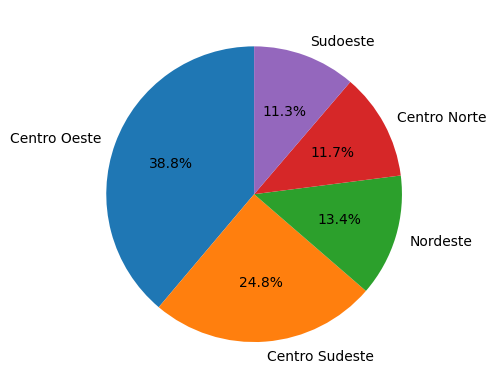

In [159]:
plt.pie(obitos, labels = macrorregioes, autopct= "%1.1f%%", startangle=90)
plt.show()